In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('train.csv')
x_train=df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
y_train=df[['SalePrice']]
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()

In [3]:
def zscore_normalise_features(x):
    mu=np.mean(x,axis=0)
    sd=np.std(x,axis=0)
    x_norm=(x-mu)/sd
    return mu,sd,x_norm
mu,sd,x_norm_train=zscore_normalise_features(x_train)

In [4]:
def compute_cost(x,y,w,b):
    m,n=np.shape(x)
    cost=0
    for i in range (m):
        cost=cost+ (np.dot(x[i],w)+b-y[i])**2
    cost/=(2*m)
    return cost

In [5]:
def compute_gradient(x,y,w,b):
    m,n=np.shape(x)
    dj_dw=np.zeros((n,))
    dj_db=0
    for i in range(m):
        err=(np.dot(w,x[i])+b-y[i])
        dj_db=dj_db+err
        for j in range (n):
            dj_dw[j]=dj_dw[j]+err*x[i,j]
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db
m,n=np.shape(x_train)
w=np.zeros((n,))
b=0
compute_gradient(x_norm_train,y_train,w,b)

/var/folders/hq/31k7qhxj16315fvc4cc2j2b00000gn/T/ipykernel_903/869326222.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]=dj_dw[j]+err*x[i,j]


(array([-62867.30139769, -56525.60173279, -51397.10257495, -51362.78431463,
        -48588.81298304, -48192.37248322, -44750.2165107 , -42357.77345397,
        -41989.28438221, -39745.92960913]),
 array([-181223.59160959]))

In [12]:
def gradient_descent(x,y,w,b,alpha,num_iters):
    j_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        j_history.append(compute_cost(x,y,w,b))
    return w,b,j_history  
b=0
num_iters=600
w_fin,b_fin,j_hist=gradient_descent(x_norm_train,y_train,w,b,0.02,num_iters)
print(w_fin)
print(b_fin)
print(j_hist)


/var/folders/hq/31k7qhxj16315fvc4cc2j2b00000gn/T/ipykernel_903/869326222.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j]=dj_dw[j]+err*x[i,j]


[27203.25134705 23603.45630598  7597.55977531  4549.57212402
  7562.05902789  6190.85044797 -2812.3822549   2216.6952727
  7203.51944936  6156.34231916]
[181222.60564765]
[array([1.84990428e+10]), array([1.75060199e+10]), array([1.66107184e+10]), array([1.57976343e+10]), array([1.50541938e+10]), array([1.43701765e+10]), array([1.37372526e+10]), array([1.31486122e+10]), array([1.25986681e+10]), array([1.20828177e+10]), array([1.15972522e+10]), array([1.1138803e+10]), array([1.07048193e+10]), array([1.02930693e+10]), array([9.90166113e+09]), array([9.52897932e+09]), array([9.17363369e+09]), array([8.83441834e+09]), array([8.51027862e+09]), array([8.20028452e+09]), array([7.90360927e+09]), array([7.61951198e+09]), array([7.34732368e+09]), array([7.08643602e+09]), array([6.83629202e+09]), array([6.59637864e+09]), array([6.36622068e+09]), array([6.14537577e+09]), array([5.93343031e+09]), array([5.72999606e+09]), array([5.53470737e+09]), array([5.34721883e+09]), array([5.16720333e+09]), arra

(600,)
(600, 1)


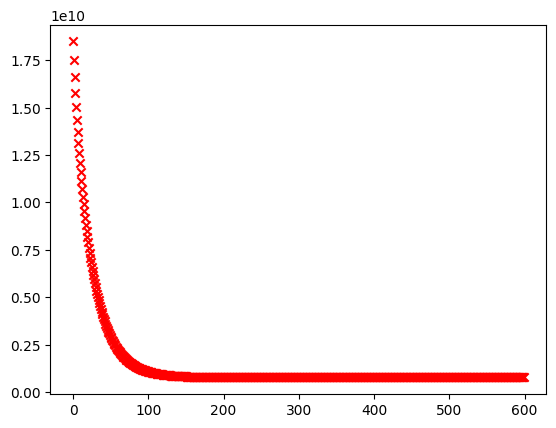

In [13]:
iters=np.arange(num_iters)
print(np.shape(iters))
j_hist=np.array(j_hist)
print(np.shape(j_hist))
plt.scatter(iters,j_hist,color='red',marker='x')

In [8]:
df2=pd.read_csv('test.csv')
x_test=df2[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
y_test=df2[["SalePrice"]]
m,n=np.shape(x_test)

x_test=x_test.to_numpy()

y_pred=np.zeros((m,))
#x_test_norm=zscore_normalise_features(x_test)[2]
x_test_norm=(x_test-mu)/sd
for i in range(m):
    y_pred[i]+=(np.dot(x_test_norm[i],w_fin)+b_fin[0])
print(y_pred)

[272103.19836193 178673.51046691 179748.71521776 177372.73569779
  74950.63828025 104161.76430719 113776.28229237 186085.56645243
 212702.99775977 159210.8042599  217879.46456531 117253.52579793
 177031.7118797  140197.06389469 285606.21100974 166559.61510284
 205039.43430955 231523.57821518 146650.12669587 154945.03430118
 236678.66081474 267771.35852692 197409.48345918 125177.80568132
 243207.3366394  144682.36616612 210982.30383204  88187.53479708
 137989.73732208 169504.91092482 280910.75128763 180722.21096821
 177469.91132737 130065.18440542 148908.28721279 142621.90697574
   9646.09460299 244748.56048952 359228.88705985 182370.61484516
 133736.2393668  102444.95047859  63146.64768972  60191.95340364
 152990.64061078 163040.00770838  83018.23013447 234326.26121642
 103423.72422909 164686.84907319 124270.92621914 231166.08102125
 254972.64423815 223110.74321577 121523.52121909 116543.86795213
 213602.81952218 220717.72359906 224217.92119709  88564.19804022
 179676.41454892 178430.4

In [9]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 82.0%
